In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from jupyterthemes import jtplot
jtplot.style(grid=False)

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set figure size
plt.rcParams["figure.figsize"] = (10,10)
# specify decimal places to display
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [37]:
def get_lower_and_upper_bounds(series, multiplier=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (multiplier * iqr)
    upper = q3 + (multiplier * iqr)
    print('lower:',lower)
    print('upper:',upper)
    return lower, upper

# 1. Using lemonade.csv dataset and focusing on continuous variables:

 - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
 

In [3]:
lemonade = pd.read_csv('lemonade.csv')
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [16]:
lemonade.iloc[:,2:]

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
3,44.1,1.05,28,0.5,17
4,42.4,1.00,33,0.5,18
5,25.3,1.54,23,0.5,11
6,32.9,1.54,19,0.5,13
7,37.5,1.18,28,0.5,15
8,38.1,1.18,20,0.5,17
9,43.4,1.05,33,0.5,18


In [38]:
for col in lemonade.iloc[:,2:]:
    print (col)
    print ('___________')
    get_lower_and_upper_bounds(lemonade[col])
    print()

Temperature
___________
lower: 16.700000000000003
upper: 104.7

Rainfall
___________
lower: 0.26
upper: 1.3

Flyers
___________
lower: 4.0
upper: 76.0

Price
___________
lower: 0.5
upper: 0.5

Sales
___________
lower: 5.0
upper: 45.0



In [39]:
#Temp outliers
lower, upper = get_lower_and_upper_bounds(lemonade.Temperature)
lemonade[(lemonade.Temperature < lower)|(lemonade.Temperature > upper)]

lower: 16.700000000000003
upper: 104.7


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [40]:
#Rainfall outliers
lower, upper = get_lower_and_upper_bounds(lemonade.Rainfall)
lemonade[(lemonade.Rainfall < lower)|(lemonade.Rainfall > upper)]

lower: 0.26
upper: 1.3


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [41]:
#Flyers outliers
lower, upper = get_lower_and_upper_bounds(lemonade.Flyers)
lemonade[(lemonade.Flyers < lower)|(lemonade.Flyers > upper)]

lower: 4.0
upper: 76.0


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [42]:
#Sales outliers
lower, upper = get_lower_and_upper_bounds(lemonade.Sales)
lemonade[(lemonade.Sales < lower)|(lemonade.Sales > upper)]

lower: 5.0
upper: 45.0


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


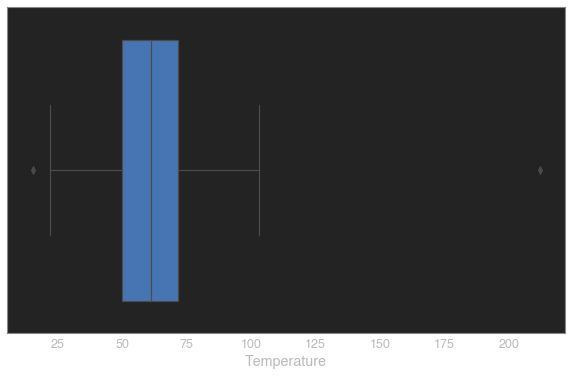

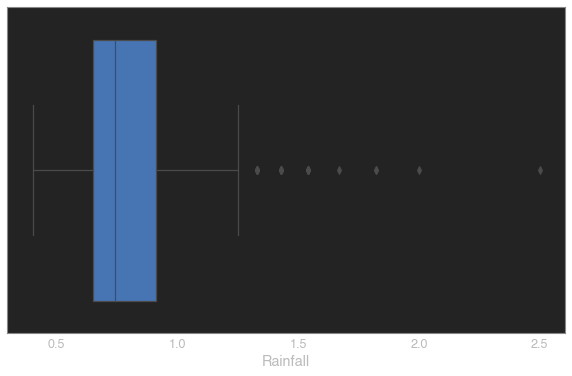

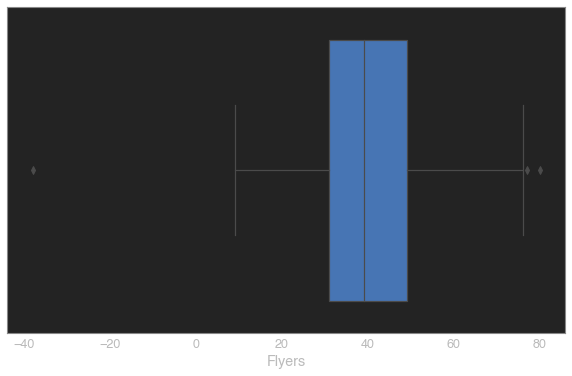

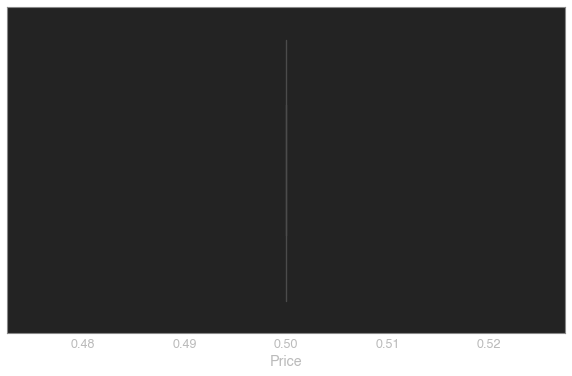

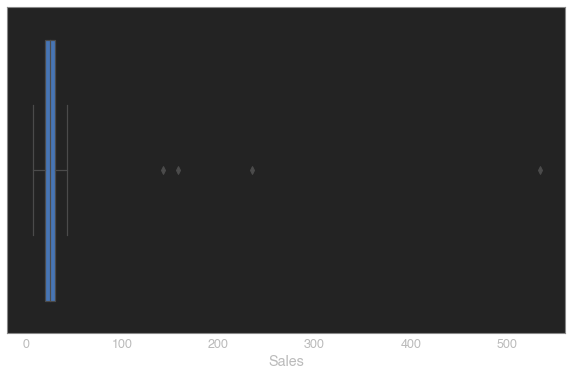

In [31]:
for col in lemonade.iloc[:,2:]:
    plt.figure(figsize=(10,6))
    sns.boxplot(lemonade[col])
    plt.show()

In [ ]:
# 200+ Temperature outlier can get thrown out as well as -40 flyers. Keep the rain and sales outliers

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each column of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [32]:
for col in lemonade.iloc[:,2:]:
    print (col)
    print ('___________')
    get_lower_and_upper_bounds(lemonade[col],multiplier=3)
    print()

Temperature
___________
lower: -16.299999999999997
upper: 137.7

Rainfall
___________
lower: -0.13
upper: 1.69

Flyers
___________
lower: -23.0
upper: 103.0

Price
___________
lower: 0.5
upper: 0.5

Sales
___________
lower: -10.0
upper: 60.0



In [43]:
#3x iqr temp
lower, upper = get_lower_and_upper_bounds(lemonade.Temperature,multiplier=3)
lemonade[(lemonade.Temperature < lower)|(lemonade.Temperature > upper)]

lower: -16.299999999999997
upper: 137.7


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [44]:
#3x iqr rain
lower, upper = get_lower_and_upper_bounds(lemonade.Rainfall,multiplier=3)
lemonade[(lemonade.Rainfall < lower)|(lemonade.Rainfall > upper)]

lower: -0.13
upper: 1.69


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [45]:
#3x iqr Flyers
lower, upper = get_lower_and_upper_bounds(lemonade.Flyers,multiplier=3)
lemonade[(lemonade.Flyers < lower)|(lemonade.Flyers > upper)]

lower: -23.0
upper: 103.0


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [46]:
#3x iqr sales
lower, upper = get_lower_and_upper_bounds(lemonade.Sales,multiplier=3)
lemonade[(lemonade.Sales < lower)|(lemonade.Sales > upper)]

lower: -10.0
upper: 60.0


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [ ]:
# -10 sales as well as -0.13 rainfall doesn't make sense.

# 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.

<Figure size 864x576 with 0 Axes>

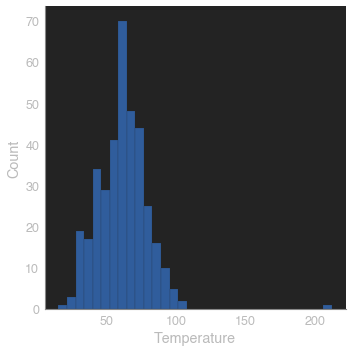

<Figure size 864x576 with 0 Axes>

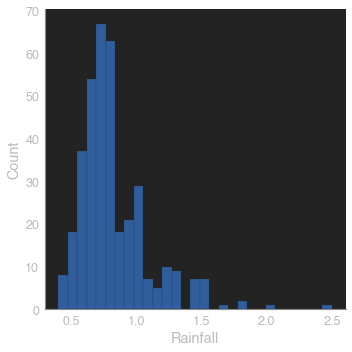

<Figure size 864x576 with 0 Axes>

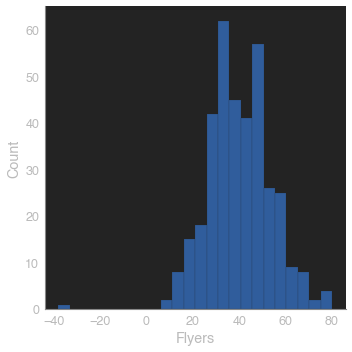

<Figure size 864x576 with 0 Axes>

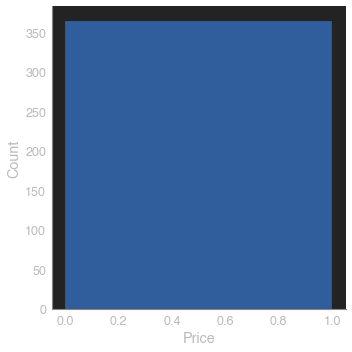

<Figure size 864x576 with 0 Axes>

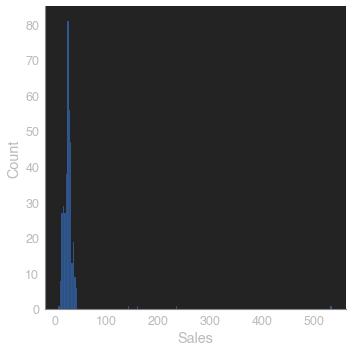

In [35]:
for col in lemonade.iloc[:,2:]:
    plt.figure(figsize=(12,8))
    sns.displot(lemonade[col])
    plt.show()

In [36]:
lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [52]:
def get_sigma(df, col_name, sigma):
    x = df[col_name]
    zscores = pd.Series((x - x.mean()) / x.std())
    return df[zscores.abs() >= sigma]    

In [53]:
get_sigma(lemonade, 'Temperature', 2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [54]:
get_sigma(lemonade, 'Rainfall', 2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
19,1/20/17,Friday,31.6,1.43,20,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


In [55]:
get_sigma(lemonade, 'Flyers', 2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


In [56]:
get_sigma(lemonade, 'Sales', 2)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


- Do these make sense?

In [ ]:
# yes because 95% of observations are within 2 stdevs of mean for normally distributed variables

- Should certain outliers be kept or removed?

In [ ]:
# keep the sales outliers, remove negative flyers

# 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [57]:
get_sigma(lemonade, 'Temperature', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [58]:
get_sigma(lemonade, 'Rainfall', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
15,1/16/17,Monday,30.6,1.67,24,0.5,12
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [59]:
get_sigma(lemonade, 'Flyers', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [60]:
get_sigma(lemonade, 'Sales', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
